<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Project (Cars Dataset)

## Submitted by Dhaval Parikh (GCD Nov. 2018 Batch).

###  This is a cars dataset having 9576 observation and 10 different variables. Build regression model using the provided predictor variables for the prediction of sales price of cars.


### Import the dataset.

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas_profiling
from pylab import rcParams

from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.cross_decomposition import PLSSVD
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lasso

from joblib import dump, load

In [2]:
plt.rcParams.update({'font.size': 22})
rcParams["figure.figsize"] = [18, 6]

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
plt.rc('font', **font)

sns.set(font_scale=1)
plt.style.use('seaborn')

In [3]:
car = pd.read_csv("./car_sales.csv",encoding="latin_1")
# car.drop('Unnamed: 0',axis=1,inplace=True)
car.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


### Check the shape of the dataset.

In [4]:
def lr():
    return car.shape 
lr()

(9576, 10)

### Check the descriptive stats of the dataset.

In [5]:
def lr():
    return car.describe(include="all")
lr()

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


### 1. Understand the total count and percentage of missing values.

In [6]:
def lr():
    total = car.isnull().sum().sort_values(ascending=False)
    percent = (car.isnull().sum()/car.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    miss = print(missing_data)
    return miss
lr()

              Total   Percent
drive           511  0.053363
engV            434  0.045322
model             0  0.000000
year              0  0.000000
registration      0  0.000000
engType           0  0.000000
mileage           0  0.000000
body              0  0.000000
price             0  0.000000
car               0  0.000000


### 2. Impute the missing values

In [7]:
# car["drive"].fillna(car.groupby(["car",'model','body'])["drive"].transform("count"))

# pd.DataFrame(data=car.groupby(["car",'model']).drive.value_counts())
# (pd.DataFrame(data=car.groupby(["car",'model']).drive.value_counts(), columns = ["counts"]).reset_index(inplace=True))
# df.columns = ["counts"]
# df.reset_index(inplace=True)
# df[(df.car == 'Acura')&(df.counts == df[(df.car == 'Acura')].counts.max())].drive[0]

In [8]:
import numpy as np
from sklearn.preprocessing import Imputer
def lr():
#     imputer = Imputer(missing_values='NaN',strategy="most_frequent",axis=0)
#     imputer.fit_transform(car)
    car.loc[car[(car.price <= 0)].index,'price'] = np.NaN
    car["price"].fillna(car.groupby(["car",'model'])["price"].transform("mean"), inplace=True)
    car["engV"].fillna(car.groupby(["car",'model'])["engV"].transform("mean"), inplace=True)
    car["drive"].fillna(car["drive"].value_counts().index[0], inplace=True)
    car.drop_duplicates(keep="first",inplace=True)
    car.dropna(axis=0, inplace=True)
    return
lr()
print(car.isnull().sum())
print(car.shape)
print(car.drive.unique())
print(car[(car.price == 0)].price)

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64
(9423, 10)
['full' 'rear' 'front']
Series([], Name: price, dtype: float64)


### 3. Create dummy variables for "body",  "drive" & "engType" and  drop the original variable.

In [9]:
car_dummy =pd.DataFrame()                                             # Creating an empty data frame
def lr(car):
    dummies = pd.get_dummies(car, columns=['body','drive','engType','registration'], drop_first=True)
    return dummies
car_dummy = lr(car)
print(car_dummy.head())
print(car_dummy.columns)

             car    price  mileage      engV  year    model  body_hatch  \
0           Ford  15500.0       68  2.500000  2010     Kuga           0   
1  Mercedes-Benz  20500.0      173  1.800000  2011  E-Class           0   
2  Mercedes-Benz  35000.0      135  5.500000  2008   CL 550           0   
3  Mercedes-Benz  17800.0      162  1.800000  2012    B 180           0   
4  Mercedes-Benz  33000.0       91  2.557887  2013  E-Class           0   

   body_other  body_sedan  body_vagon  body_van  drive_full  drive_rear  \
0           0           0           0         0           1           0   
1           0           1           0         0           0           1   
2           1           0           0         0           0           1   
3           0           0           0         1           0           0   
4           0           0           1         0           0           0   

   engType_Gas  engType_Other  engType_Petrol  registration_yes  
0            1              0   

### 4. Check Correlation between Numerical columns (Including Dummy columns)

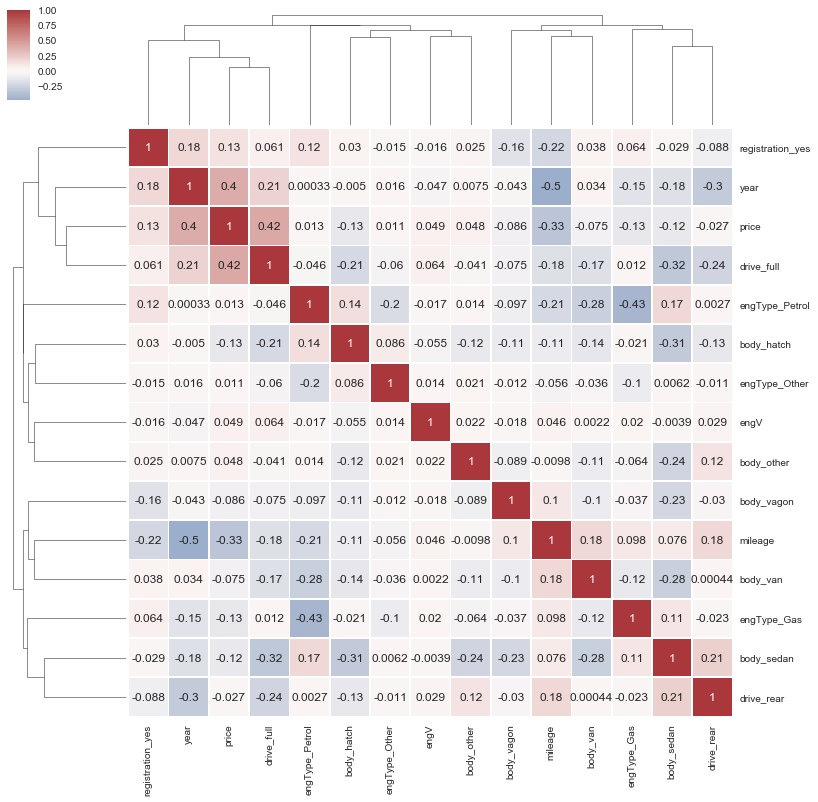

In [10]:
ax=sns.clustermap(car_dummy.corr(), center=0, cmap="vlag", annot = True, linewidths=.75, figsize=(13, 13));

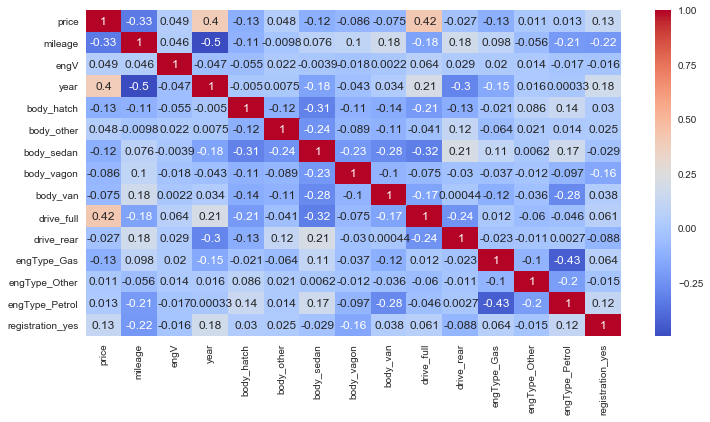

In [11]:
plt.figure(figsize=(12,6))
ax = sns.heatmap(car_dummy.corr(),cmap='coolwarm',annot=True)

### Q 4. Drop the below mentioned variables which will not help in prediction of sales.
``` ['car', 'model'] ``` as these are Text Columns

In [12]:
def lr(car_dummy):
    car_drop = car_dummy.drop(car_dummy[['car', 'model']], axis=1)
    return car_drop
car_dummy = lr(car_dummy)
print (car_dummy)

              price  mileage      engV  year  body_hatch  body_other  \
0      15500.000000       68  2.500000  2010           0           0   
1      20500.000000      173  1.800000  2011           0           0   
2      35000.000000      135  5.500000  2008           0           1   
3      17800.000000      162  1.800000  2012           0           0   
4      33000.000000       91  2.557887  2013           0           0   
5      16600.000000       83  2.000000  2013           0           0   
6       6500.000000      199  2.000000  2003           0           0   
7      10500.000000      185  1.500000  2011           0           0   
8      21500.000000      146  1.800000  2012           0           0   
9      22700.000000      125  2.200000  2010           0           0   
10     20447.154000        0  1.200000  2016           0           0   
11     20400.000000      190  1.800000  2011           0           0   
12     22500.000000      164  1.800000  2012           0        

In [13]:
print(car_dummy.columns)

Index(['price', 'mileage', 'engV', 'year', 'body_hatch', 'body_other',
       'body_sedan', 'body_vagon', 'body_van', 'drive_full', 'drive_rear',
       'engType_Gas', 'engType_Other', 'engType_Petrol', 'registration_yes'],
      dtype='object')


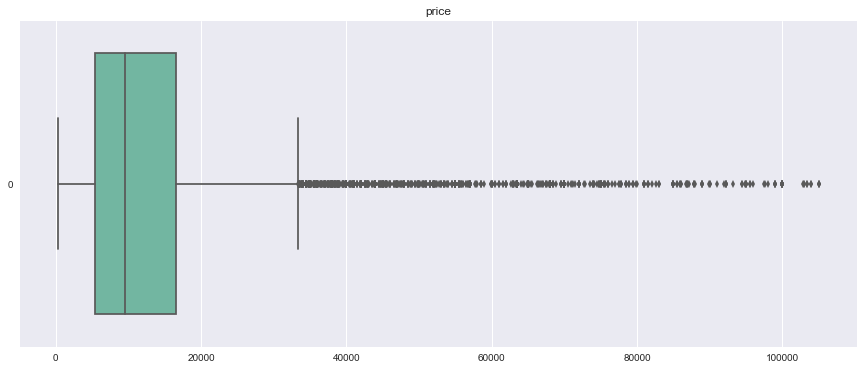

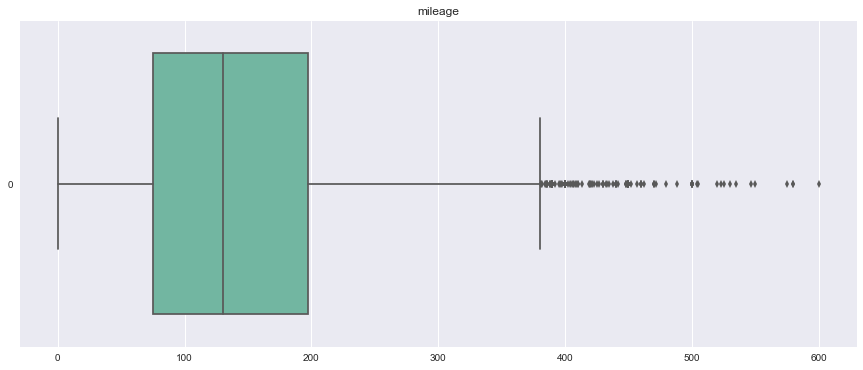

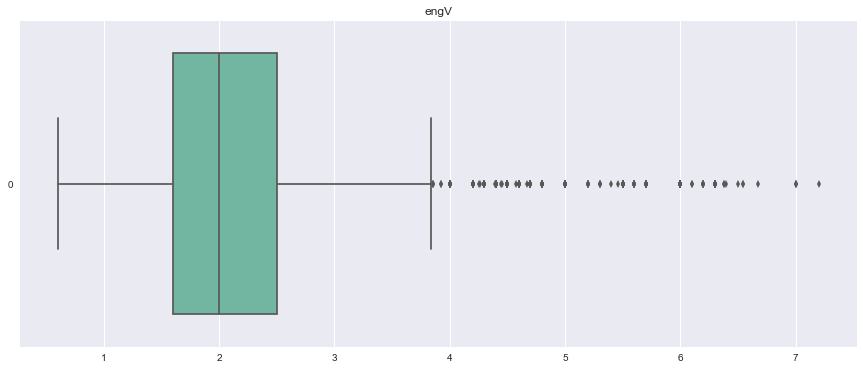

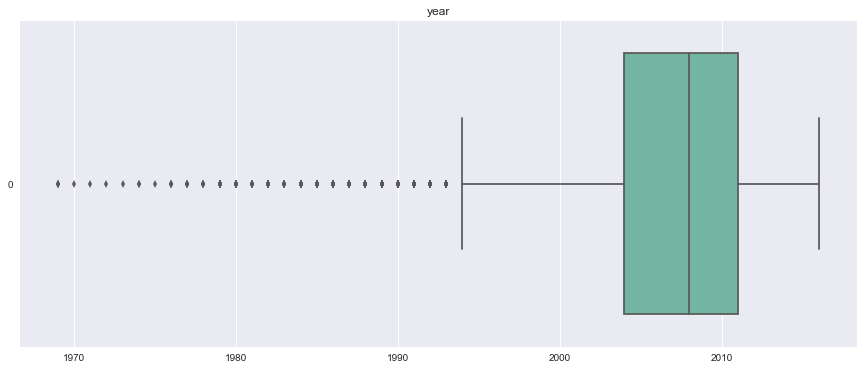

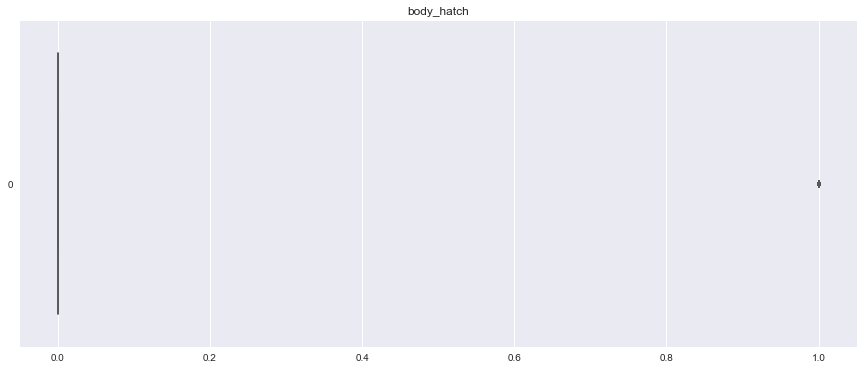

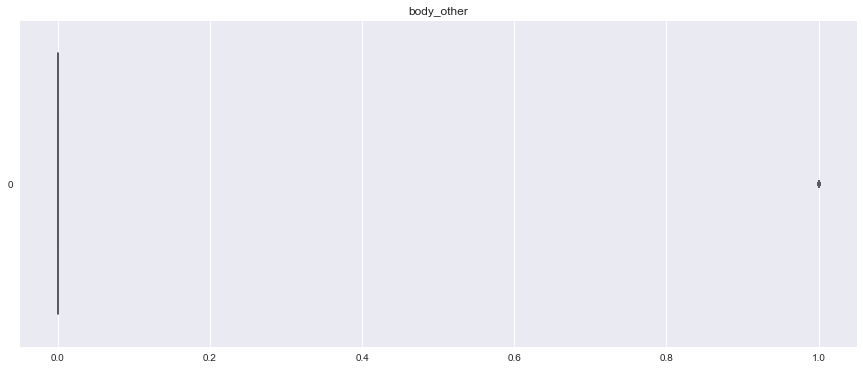

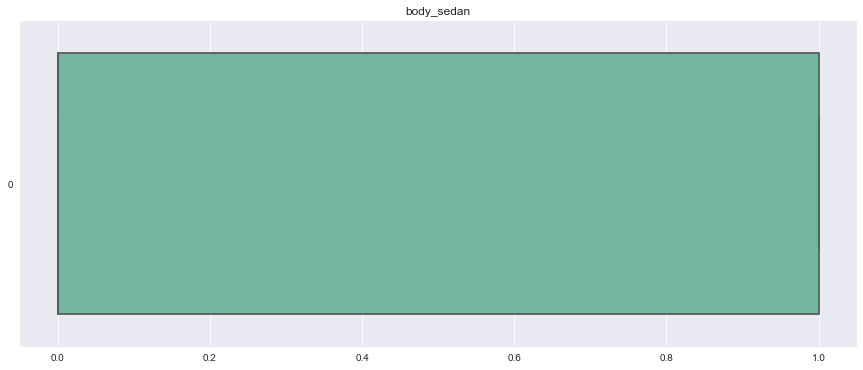

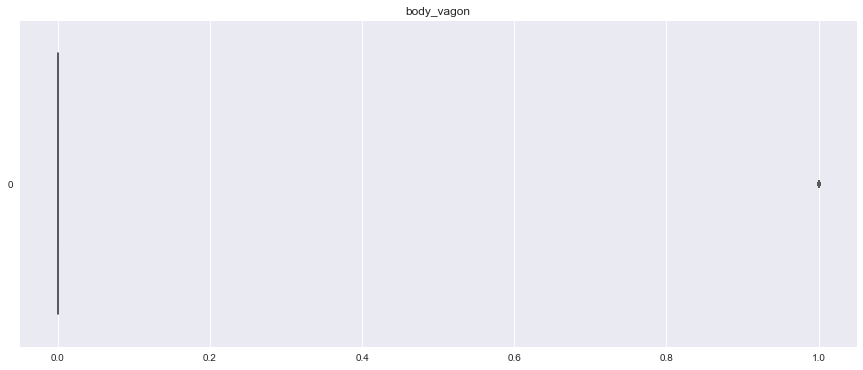

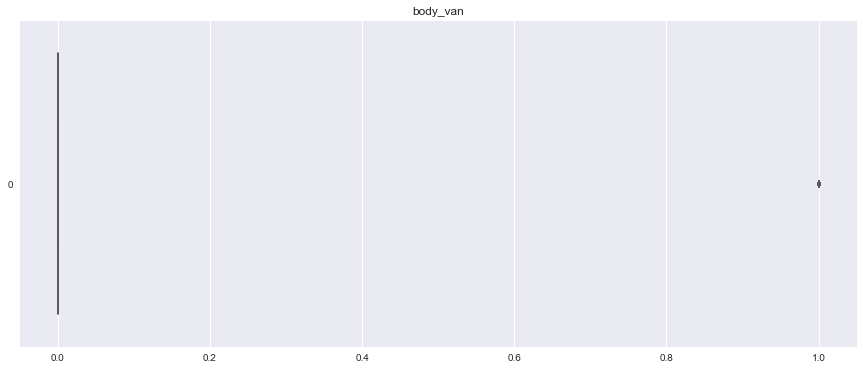

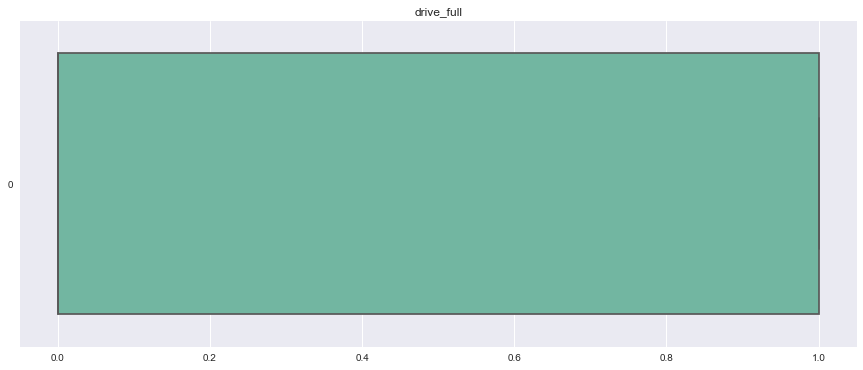

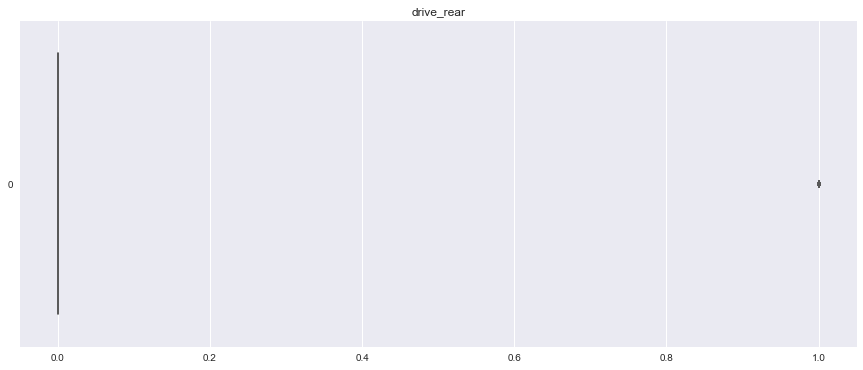

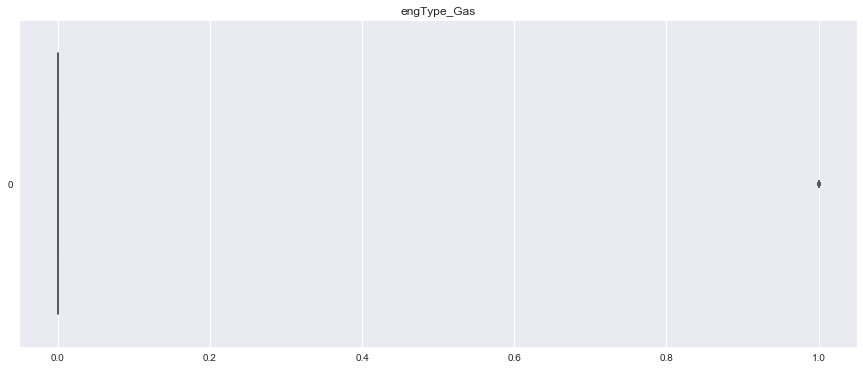

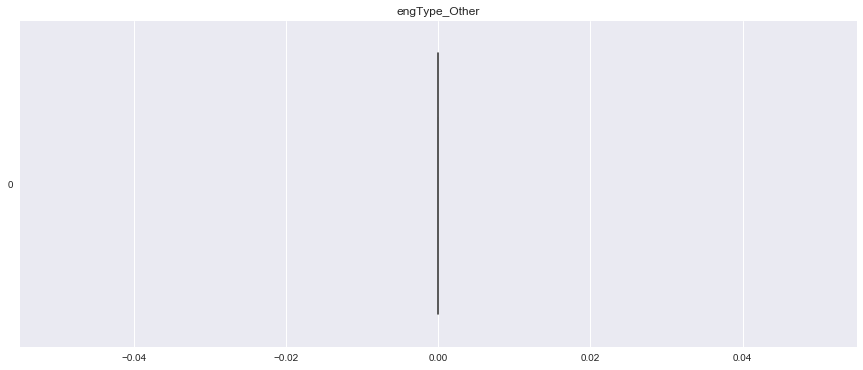

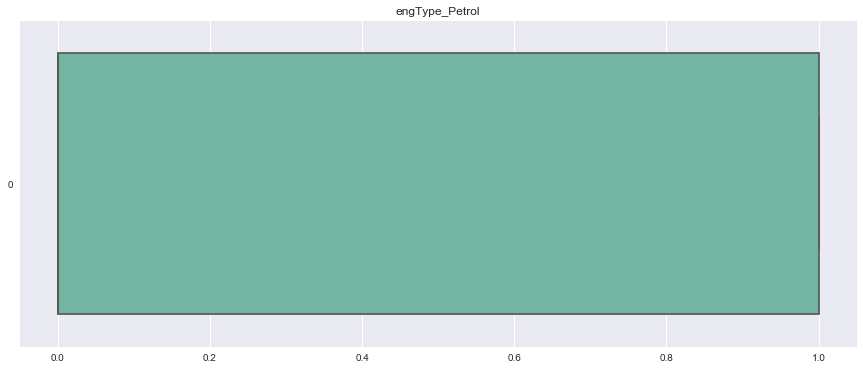

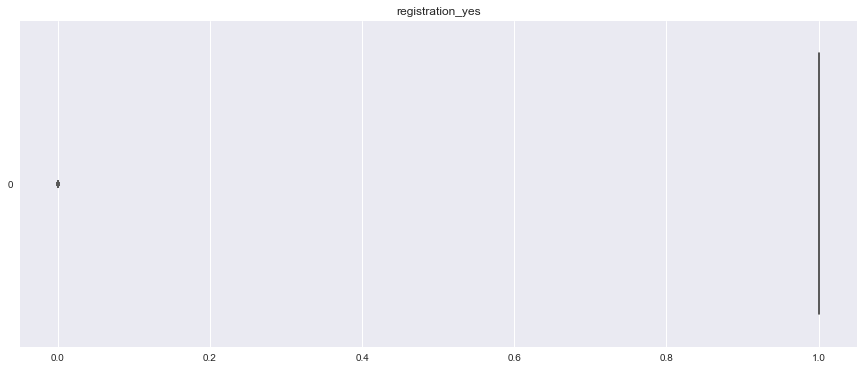

In [62]:
Cols = ['price', 'mileage', 'engV', 'year', 'body_hatch', 'body_other',
       'body_sedan', 'body_vagon', 'body_van', 'drive_full', 'drive_rear',
       'engType_Gas', 'engType_Other', 'engType_Petrol', 'registration_yes']

def lr():
    import seaborn as sns
    import matplotlib.pyplot as plt
    for col in Cols:
        plt.figure(figsize=(15,6))
        sns.boxplot(data=car_dummy[col], orient="h", palette="Set2")
        plt.title(col)
        plt.show()
    return None 
lr()

### 5. Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.

In [15]:
def lr(car_dummy):
    Q1 = car_dummy.quantile(0.05)
    Q3 = car_dummy.quantile(0.95)
    Q_diff = Q3 - Q1
    car_out = car_dummy[~((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)]
#     print(car_dummy[((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)])
    return car_out
car_dummy = lr(car_dummy)
# print (car_dummy)
print (car_dummy.columns)

car_dummy.describe()


Index(['price', 'mileage', 'engV', 'year', 'body_hatch', 'body_other',
       'body_sedan', 'body_vagon', 'body_van', 'drive_full', 'drive_rear',
       'engType_Gas', 'engType_Other', 'engType_Petrol', 'registration_yes'],
      dtype='object')


,price,mileage,engV,year,body_hatch,body_other,body_sedan,body_vagon,body_van,drive_full,drive_rear,engType_Gas,engType_Other,engType_Petrol,registration_yes
count,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.000000,8783.0,8783.000000,8783.000000
mean,14243.072593,141.557441,2.211372,2006.468291,0.126153,0.084481,0.384493,0.078219,0.112718,0.255038,0.144484,0.191962,0.0,0.480929,0.940909
std,15191.622808,92.459946,0.930200,6.799408,0.332040,0.278124,0.486503,0.268532,0.316265,0.435907,0.351599,0.393866,0.0,0.499665,0.235809
min,280.000000,0.000000,0.600000,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,5450.000000,75.000000,1.600000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,9500.000000,130.000000,2.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,16600.000000,197.000000,2.500000,2011.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,105000.000000,600.000000,7.200000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [16]:
car_dummy.shape

(8783, 15)

### 6. Write code to standardize the variable for model building (return value will be numpy.ndarray).

In [17]:
std = pd.DataFrame()
car_modify = car_dummy.drop(car_dummy[['price']], axis=1)
def lr(car_modify):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(car_modify)
    st = scaler.transform(car_modify)
    return st
std = lr(car_modify)
print(std.shape)
print(car_modify.head(1))
print(std[1])

(8783, 14)
   mileage  engV  year  body_hatch  body_other  body_sedan  body_vagon  \
0       68   2.5  2010           0           0           0           0   

   body_van  drive_full  drive_rear  engType_Gas  engType_Other  \
0         0           1           0            1              0   

   engType_Petrol  registration_yes  
0               0                 1  
[ 0.34008618 -0.44226559  0.66652381 -0.37995371 -0.30377143  1.26523877
 -0.29130177 -0.35642262 -0.58510734  2.43335114  2.05167524  0.
 -0.96255856  0.2506043 ]


### 7. Create a DataFrame from the standardized value calculated above

### Since the standardized value is a numpy array, add the data to a dataframe with column header as mentioned below in the same order

```['mileage', 'engV', 'year', 'age', 'mpy', 'body_hatch',
       'body_other', 'body_sedan', 'body_vagon', 'body_van', 'drive_full',
       'drive_rear', 'engType_Gas', 'engType_Other', 'engType_Petrol',
       'registration_yes'] ```

In [18]:
columns = ['mileage', 'engV', 'year', 'body_hatch', 'body_other',
       'body_sedan', 'body_vagon', 'body_van', 'drive_full', 'drive_rear',
       'engType_Gas', 'engType_Other', 'engType_Petrol', 'registration_yes']
def lr(std):
    cars= pd.DataFrame(std)
    cars.columns = columns
    return cars
cars = lr(std)
print(cars.head())
print(cars.shape)

    mileage      engV      year  body_hatch  body_other  body_sedan  \
0 -0.795605  0.310303  0.519444   -0.379954   -0.303771   -0.790365   
1  0.340086 -0.442266  0.666524   -0.379954   -0.303771    1.265239   
2 -0.070926  3.535598  0.225284   -0.379954    3.291949   -0.790365   
3  0.221109 -0.442266  0.813604   -0.379954   -0.303771   -0.790365   
4 -0.633364 -0.227246  0.960684   -0.379954   -0.303771   -0.790365   

   body_vagon  body_van  drive_full  drive_rear  engType_Gas  engType_Other  \
0   -0.291302 -0.356423    1.709088   -0.410956     2.051675            0.0   
1   -0.291302 -0.356423   -0.585107    2.433351     2.051675            0.0   
2   -0.291302 -0.356423   -0.585107    2.433351    -0.487407            0.0   
3   -0.291302  2.805658   -0.585107   -0.410956    -0.487407            0.0   
4   -0.291302 -0.356423    1.709088   -0.410956    -0.487407            0.0   

   engType_Petrol  registration_yes  
0       -0.962559          0.250604  
1       -0.962559     

### 8: Now since all variable may not be of use, please extract only the following variables for training. 

##### Preparing X (independent features) for the model building.
##### This set was arraived at by way of ittration.

```['mileage', 'engV', 'year', 'body_van', 'drive_full', 'drive_rear',
       'engType_Gas', 'engType_Petrol', 'registration_yes']```

In [19]:
X = pd.DataFrame()
feature_cols = ['mileage', 'engV', 'year', 'body_van', 'drive_full', 'drive_rear',
       'engType_Gas', 'engType_Petrol', 'registration_yes']                
def lr(cars):
    X = cars[feature_cols]
    return X
X = lr(cars)
print(X)

       mileage      engV      year  body_van  drive_full  drive_rear  \
0    -0.795605  0.310303  0.519444 -0.356423    1.709088   -0.410956   
1     0.340086 -0.442266  0.666524 -0.356423   -0.585107    2.433351   
2    -0.070926  3.535598  0.225284 -0.356423   -0.585107    2.433351   
3     0.221109 -0.442266  0.813604  2.805658   -0.585107   -0.410956   
4    -0.633364 -0.227246  0.960684 -0.356423    1.709088   -0.410956   
5     0.621305 -0.227246 -0.510116 -0.356423   -0.585107   -0.410956   
6     0.469879 -0.764795  0.666524 -0.356423   -0.585107   -0.410956   
7     0.048051 -0.442266  0.813604 -0.356423   -0.585107    2.433351   
8    -0.179087 -0.012226  0.519444 -0.356423   -0.585107    2.433351   
9    -1.531101 -1.087325  1.401924 -0.356423   -0.585107   -0.410956   
10    0.523960 -0.442266  0.666524 -0.356423   -0.585107    2.433351   
11    0.242741 -0.442266  0.813604 -0.356423   -0.585107    2.433351   
12    0.632121 -0.534417 -1.539676 -0.356423   -0.585107    2.43

### Check for the type and shape of X.

In [20]:
def lr():
    print(type(X))
    print(X.shape)
lr()

<class 'pandas.core.frame.DataFrame'>
(8783, 9)


### 9. Extract y (dependent variable) for model building.
```['price']```

In [21]:
y = pd.DataFrame()
def lr(car_dummy):
    y = car_dummy['price']
    return y
y = lr(car_dummy)
print(y.head())

0    15500.0
1    20500.0
2    35000.0
3    17800.0
5    16600.0
Name: price, dtype: float64


### Check for the type and shape of y. 

In [22]:
def lr():
    print(type(y))
    print(y.shape)
lr()

<class 'pandas.core.series.Series'>
(8783,)


<a id=section403></a>

### 10. Split the value of X and y into train and test datasets.

In [23]:
from sklearn.model_selection import train_test_split
##############################

test_size=0.30
random_state = 1
poly_degree = 3

##############################
def lr():
    return train_test_split(X, y, test_size=test_size, random_state=random_state)
X_train, X_test, y_train, y_test = lr()

### Check the shape of  X and y of train dataset.

In [24]:
def lr():
    print(X_train.shape)
    print(y_train.shape)
lr()

(6148, 9)
(6148,)


### Check the shape of X and y of test dataset.

In [25]:
def lr():
    print(X_test.shape)
    print(y_test.shape)
lr()

(2635, 9)
(2635,)


### 11. Spot Check Algorithms

In [26]:
# Test options and evaluation metric
seed = 7
scoring = 'r2'

# Spot Check Algorithms
models = []
models.append(('LiR', LinearRegression()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('PLSR', PLSRegression()))
# models.append(('KR', KernelRidge()))
models.append(('BR', BayesianRidge()))
models.append(('HR', HuberRegressor()))
models.append(('LR', Lasso()))

GaussianProcessRegressor
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: Mean:%f (std: %f)(var:%f)" % (name, cv_results.mean(), cv_results.std(),cv_results.var())
    print(msg)

LiR: Mean:0.602847 (std: 0.008733)(var:0.000076)
ABR: Mean:0.728045 (std: 0.022248)(var:0.000495)
DTR: Mean:0.747501 (std: 0.027534)(var:0.000758)
RFR: Mean:0.822239 (std: 0.020160)(var:0.000406)
GBR: Mean:0.839714 (std: 0.014924)(var:0.000223)
BR: Mean:0.819942 (std: 0.007862)(var:0.000062)
ETR: Mean:0.809915 (std: 0.007793)(var:0.000061)
PLSR: Mean:0.596179 (std: 0.010432)(var:0.000109)
BR: Mean:0.602858 (std: 0.008732)(var:0.000076)
HR: Mean:0.536224 (std: 0.010682)(var:0.000114)
LR: Mean:0.602847 (std: 0.008734)(var:0.000076)


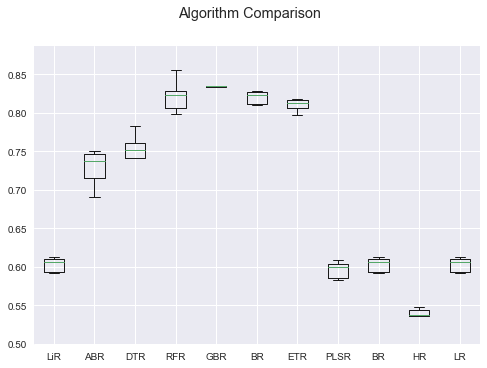

In [27]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 12. Based on the above will be furthe evaluating following models.
1. "BaggingRegressor", 
2. "RandomForestRegressor" 
3. "GradientBoostingRegressor"
4. "LinearRegression"
5. Polinomial Regression

In [28]:
trained_models = []

def get_trained_models(models):
    for name, model in models:        
        fited_model = model.fit(X_train,y_train)
        trained_models.append((name, fited_model))
    return trained_models

In [29]:
models_summary = []
names = []

cols = ["MAE", "MSE", "RMSE", "R2", "ADJ_R2"]
def predict(trained_models):
    for name, model in trained_models:  
        y_pred=model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        p = X.shape[1]
        n_test = y_test.size
        adj_r2 = 1-((1-r2)*(n_test-1)/(n_test-p-1))
        predidted_y.append((name, y_pred))
        models_summary.append([mae, mse, rmse, r2, adj_r2])
        names.append(name)
        
    results = pd.DataFrame(data=models_summary, index=names, columns=cols)
    return names,results,predidted_y    

In [30]:
models = []
trained_models = []
models.append(('LiR', LinearRegression()))
models.append(('RFR', RandomForestRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('BR', BaggingRegressor()))
trained_models = get_trained_models(models)

In [31]:
models_summary = []
names = []
predidted_y = []
algo_names,predicted_results,y_preds = predict(trained_models)
print(predicted_results)

             MAE           MSE         RMSE        R2    ADJ_R2
LiR  6238.519040  8.723365e+07  9339.895705  0.589282  0.587874
RFR  3436.641188  4.029258e+07  6347.643630  0.810292  0.809642
GBR  3336.917191  3.468688e+07  5889.556860  0.836686  0.836126
BR   3408.690669  3.863583e+07  6215.773068  0.818093  0.817469


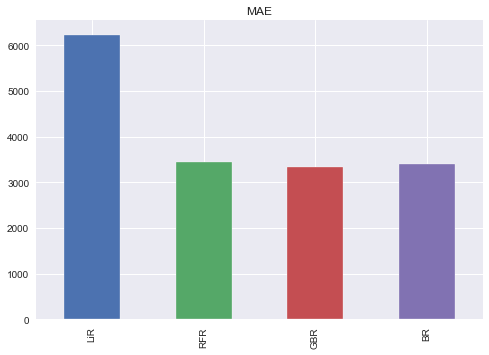

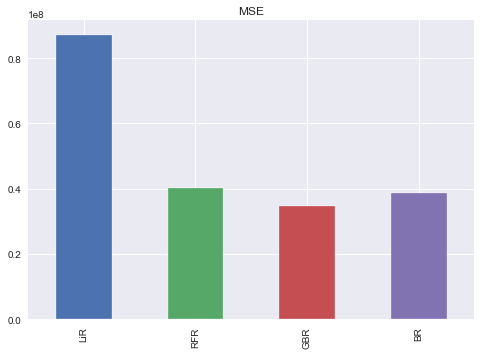

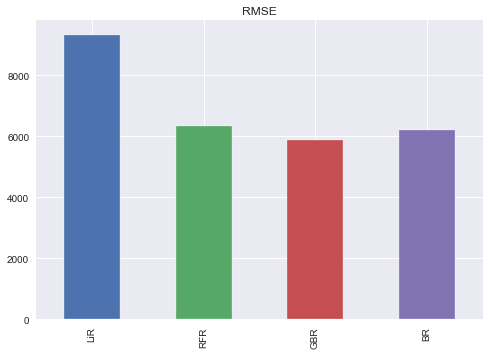

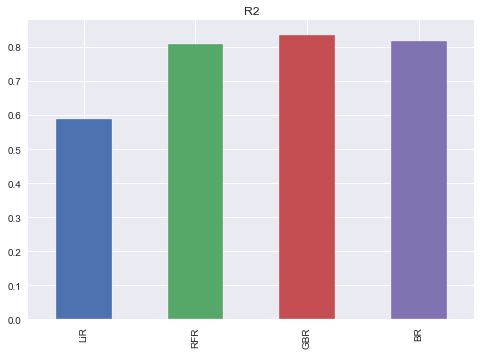

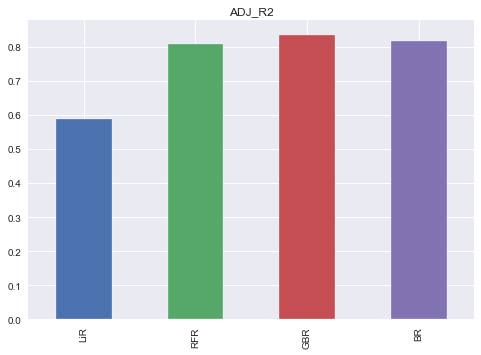

In [32]:
for col in predicted_results.columns:
    predicted_results[col].plot.bar()
    plt.title(col)
    plt.show()

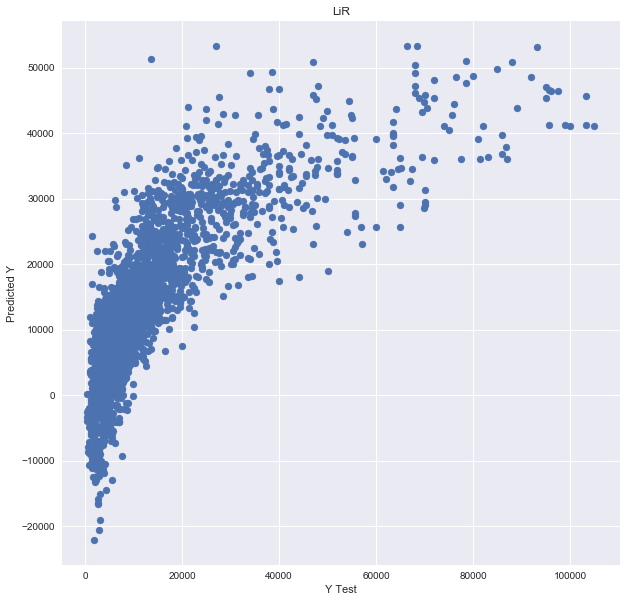

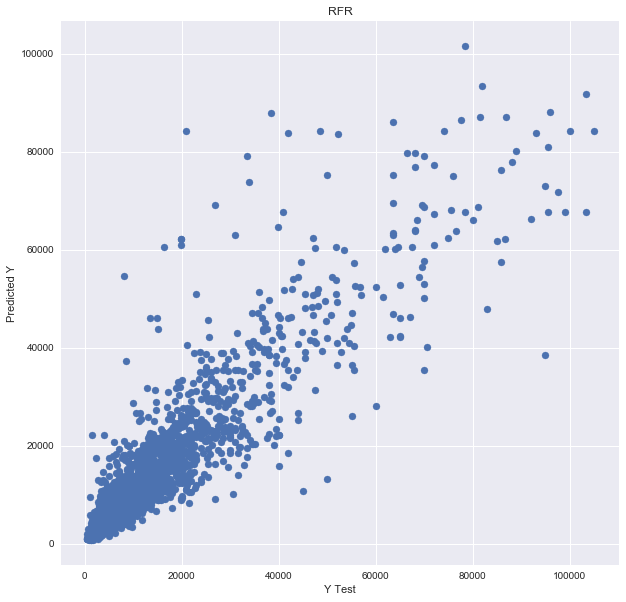

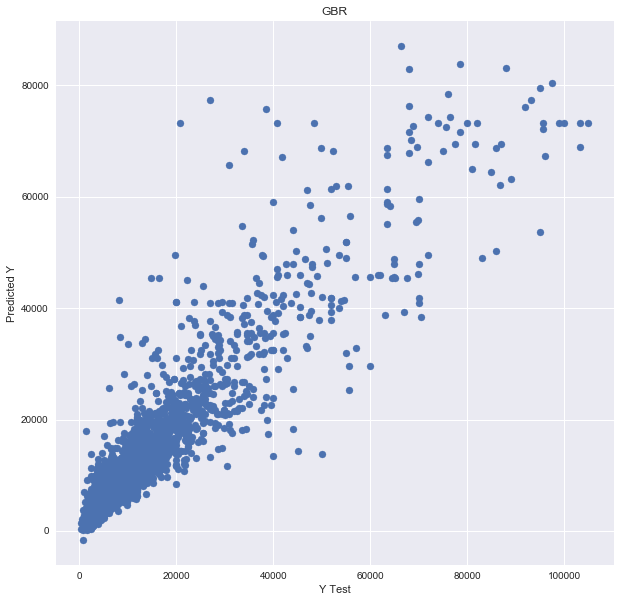

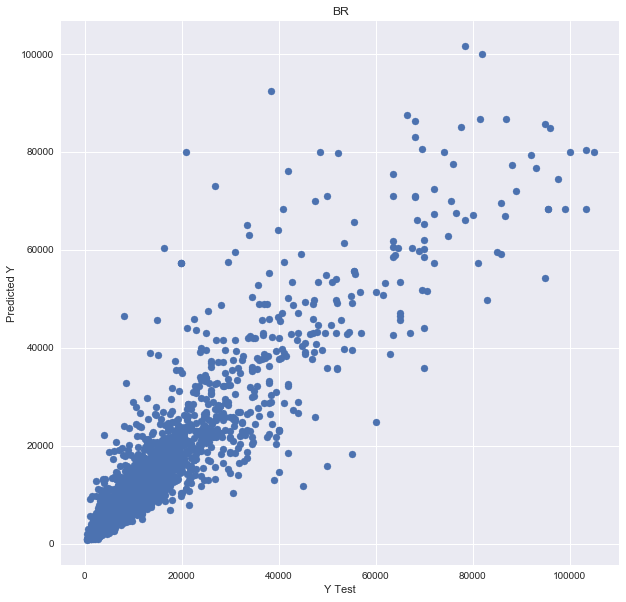

In [33]:
for name,y_pred_mod in y_preds:
    plt.figure(figsize=(10,10))
#     plt.scatter(x=y_train,y=y_pred_train)
    plt.scatter(x=y_test,y=y_pred_mod)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(name)
    plt.show()

### 13. Based on the above analysis further selecting the "GradientBoostingRegressor" for final model.

In [34]:
# Defining Grid Search for GBR

def split(X,y):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def GBR( X, y, gridsearch = False, parameters = {'loss':['ls', 'lad', 'huber', 'quantile']}, cv = 10):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    
    model = GradientBoostingRegressor()
    
    if not(gridsearch):
        model.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
#         parameters = {'normalize':[True,False], 'copy_X':[True, False], 'fit_intercept':[True, False]}

#         parameters = {'loss':['ls', 'lad', 'huber', 'quantile'], 
#                       'n_estimators':[100,200,300,400],
#                       'learning_rate': [0.1,0.25,0.5,0.7,0.9],
#                       'subsample':[0.4, 0.7, 1.0],
#                       'min_samples_split':[2,5,10],
#                       'min_samples_leaf':[1,3,5],
#                       'max_depth':[3,5,8]
#                      }
        model = GridSearchCV(model,parameters, cv = cv)
        model.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
#         print("estimator"+ est)
        print("Mean cross-validated score of the best_estimator : ", model.best_score_)  
        print("Parameters of the best_estimator : ", model.get_params()) 
        y_pred_test = model.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        r2_test = r2_score(y_test, y_pred_test)
        print('RMSE for the test set is {}'.format(RMSE_test))
        print('R2 score for the test set is {}'.format(r2_test))
    return model

In [35]:
GBR_Model = GBR(X,y,gridsearch=True)

Mean cross-validated score of the best_estimator :  0.8375730312529196
Parameters of the best_estimator :  {'cv': 10, 'error_score': 'raise', 'estimator__alpha': 0.9, 'estimator__criterion': 'friedman_mse', 'estimator__init': None, 'estimator__learning_rate': 0.1, 'estimator__loss': 'ls', 'estimator__max_depth': 3, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__presort': 'auto', 'estimator__random_state': None, 'estimator__subsample': 1.0, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_i

In [36]:
parameters = {
#               'loss':['ls', 'lad', 'huber', 'quantile'], 
              'n_estimators':[100,200,300,400],
#               'learning_rate': [0.1,0.25,0.5,0.7,0.9],
#               'subsample':[0.4, 0.7, 1.0],
#               'min_samples_split':[2,5,10],
#               'min_samples_leaf':[1,3,5],
#               'max_depth':[3,5,8],
              'min_impurity_decrease':[0.1,0.2,0.3]
             }

GBR_Model = GBR(X,y,gridsearch=True,parameters = parameters, cv = 30)

Mean cross-validated score of the best_estimator :  0.8426828166859941
Parameters of the best_estimator :  {'cv': 30, 'error_score': 'raise', 'estimator__alpha': 0.9, 'estimator__criterion': 'friedman_mse', 'estimator__init': None, 'estimator__learning_rate': 0.1, 'estimator__loss': 'ls', 'estimator__max_depth': 3, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__presort': 'auto', 'estimator__random_state': None, 'estimator__subsample': 1.0, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_i

In [37]:
y_pred_GBR = GBR_Model.predict(X_test)

Text(0.5,1,'Optimized GBR')

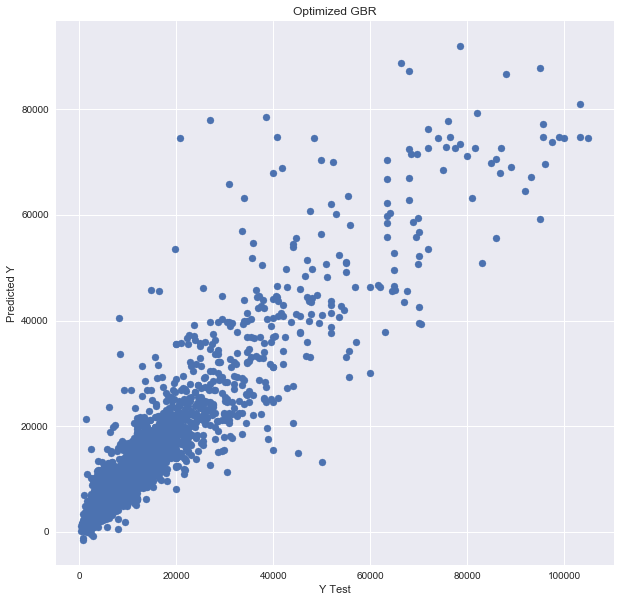

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=y_pred_GBR)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title("Optimized GBR")

### Polynomial Regrassion

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly_reg = PolynomialFeatures(degree=poly_degree)
X_poly = poly_reg.fit_transform(X)

In [41]:
def lr():
    print(type(X_poly))
    print(X_poly.shape)
lr()

<class 'numpy.ndarray'>
(8783, 220)


In [42]:
from sklearn.model_selection import train_test_split
def split(X_poly, y):
    return train_test_split(X_poly, y, test_size=test_size, random_state=random_state)
X_poly_train, X_poly_test, y_train, y_test = split(X_poly, y)

In [43]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False], 'fit_intercept':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 30)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
#         print("estimator"+ est)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        print("Parameters of the best_estimator : ", linreg.get_params()) 
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        r2_test = r2_score(y_test, y_pred_test)
        print('RMSE for the test set is {}'.format(RMSE_test))
        print('R2 score for the test set is {}'.format(r2_test))

    return linreg

In [44]:
linreg = linear_reg(X_poly,y,gridsearch=True)

Mean cross-validated score of the best_estimator :  -18477618512.64597
Parameters of the best_estimator :  {'cv': 30, 'error_score': 'raise', 'estimator__copy_X': True, 'estimator__fit_intercept': True, 'estimator__n_jobs': 1, 'estimator__normalize': False, 'estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), 'fit_params': None, 'iid': True, 'n_jobs': 1, 'param_grid': {'normalize': [True, False], 'copy_X': [True, False], 'fit_intercept': [True, False]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': 'warn', 'scoring': None, 'verbose': 0}
RMSE for the test set is 6255.636272179785
R2 score for the test set is 0.8157521267736006


In [45]:
def lr():
    model_poly = linreg.fit(X_poly_train, y_train)
#     print(model_poly.summary)
lr()

In [46]:
y_poly_pred_train = linreg.predict(X_poly_train)
pred= pd.DataFrame(y_poly_pred_train)
def lr():  
    pred.columns = ['price_pred']
    head = pred.head()
    return head
lr()



,price_pred
0,5735.507812
1,6392.562500
2,23355.210938
3,82230.250000
4,10133.000000


In [47]:
def lr():
    model = linreg.fit(X_poly_test, y_test)  
lr()

In [48]:
y_poly_pred_test = linreg.predict(X_poly_test)
pred= pd.DataFrame(y_poly_pred_test)
def lr():  
    pred.columns = ['price_pred']
    head = pred.head()
    return head
lr()
# print(pred.head())
# print(y_test.reset_index().drop("index",axis=1).head())
diff_pred = pd.concat([pred, y_test.reset_index().drop("index",axis=1)],axis=1)
diff_pred["diff_per"] = (diff_pred.price_pred - diff_pred.price)*100/diff_pred.price
print("Total : {0}".format(diff_pred.shape[0]))
print("Diff less than 10% : {0}".format(diff_pred[diff_pred.diff_per.abs() < 10].shape[0]))
print("Diff between 10-20% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 10)&(diff_pred.diff_per.abs() < 20)].shape[0]))
print("Diff between 20-30% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 20)&(diff_pred.diff_per.abs() < 30)].shape[0]))
print("Diff between 30-40% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 30)&(diff_pred.diff_per.abs() < 40)].shape[0]))
print("Diff between 40-50% : {0}".format(diff_pred[(diff_pred.diff_per.abs() >= 40)&(diff_pred.diff_per.abs() < 50)].shape[0]))
print("Diff more than 50% : {0}".format(diff_pred[diff_pred.diff_per.abs() >= 50].shape[0]))

# diff_pred.diff_per.abs()
diff_pred.head(10)

Total : 2635
Diff less than 10% : 649
Diff between 10-20% : 559
Diff between 20-30% : 479
Diff between 30-40% : 298
Diff between 40-50% : 166
Diff more than 50% : 484


,price_pred,price,diff_per
0,21640.703125,21000.00,3.050967
1,21516.171875,12900.00,66.792030
2,10219.882812,12500.00,-18.240938
3,7312.335938,7000.00,4.461942
4,6409.015625,6000.00,6.816927
5,3066.898438,2900.00,5.755119
6,14491.843750,11000.00,31.744034
7,18419.929688,50000.00,-63.160141
8,721.843750,3667.95,-80.320240
9,6013.546875,4900.00,22.725446


In [49]:
from sklearn import metrics
def lr():
    MAE_train = metrics.mean_absolute_error(y_train, y_poly_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_poly_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
lr()

MAE for training set is 3688.782965482113
MAE for test set is 3489.995057560303


In [50]:
def lr():
    MSE_train = metrics.mean_squared_error(y_train, y_poly_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_poly_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
lr()

MSE for training set is 40346107.804321125
MSE for test set is 36145409.29836884


In [51]:
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_poly_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 6351.858610227492
RMSE for test set is 6012.105230147659


In [52]:
from sklearn.metrics import r2_score
def lr():
    R2_train = r2_score(y_train, y_poly_pred_train) 
    R2_test = r2_score(y_test, y_poly_pred_test) 
    print('R2 for training set is {}'.format(R2_train))
    print('R2 for test set is {}'.format(R2_test))
lr()

R2 for training set is 0.8308135547044929
R2 for test set is 0.829818380549723


In [53]:
def lr():
    p = X_poly.shape[1]
    print(X_poly.shape)
    n_train = y_train.size
    n_test = y_test.size
    R2_train = metrics.r2_score(y_true=y_train, y_pred=y_poly_pred_train)
    R2_test = metrics.r2_score(y_true=y_test, y_pred=y_poly_pred_test)
    # Calculate Adjusted r2 for train
    print(n_train-p-1)
    AR2_train = 1-((1-R2_train)*(n_train-1)/(n_train-p-1))
    # Calculate Adjusted r2 for test 
    print(n_test-p-1)
    AR2_test = 1-((1-R2_test)*(n_test-1)/(n_test-p-1))
    # print r2 for train
    print("Adjusted R squared score for Training Set is {0}".format(AR2_train))
    # print r2 for test
    print("Adjusted R squared score for Test Set is {0}".format(AR2_test))
lr()

(8783, 220)
5927
2414
Adjusted R squared score for Training Set is 0.8245336461563215
Adjusted R squared score for Test Set is 0.8143088709063672


Text(0.5,1,' GBR Vs. Polynomial ')

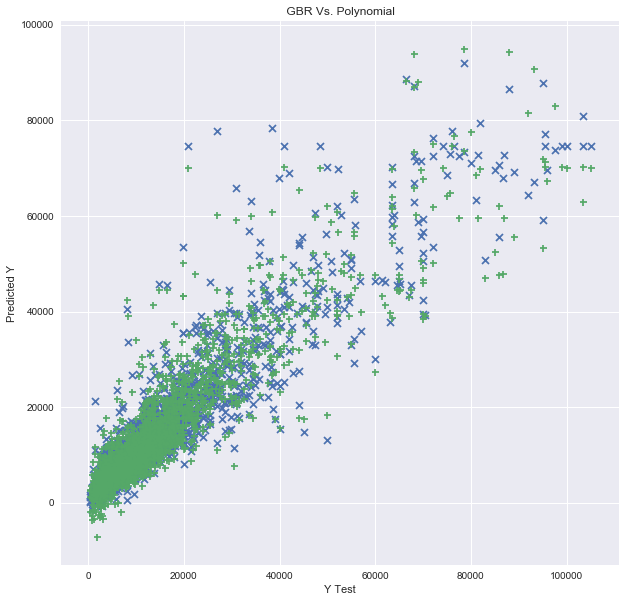

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=y_pred_GBR,marker="x")
plt.scatter(x=y_test,y=y_poly_pred_test,marker="+")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title(" GBR Vs. Polynomial ")

Text(0.5,1,'Dist Plot for Diff between Actual and Predicted - GBR ')

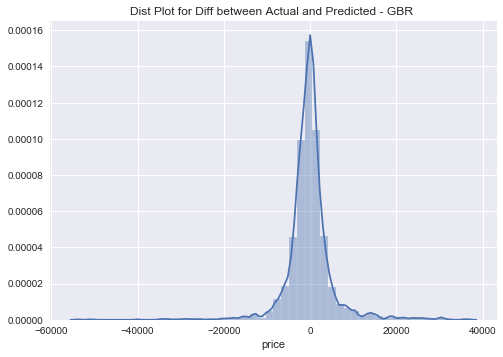

In [59]:
ax=sns.distplot((y_test-y_pred_GBR),bins=50)
ax.set_title("Dist Plot for Diff between Actual and Predicted - GBR ")

Text(0.5,1,'Dist Plot for Diff between Actual and Predicted - Polinomial')

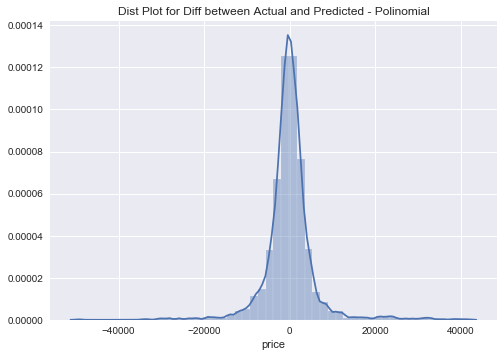

In [60]:
ax=sns.distplot((y_test-y_poly_pred_test),bins=50)
ax.set_title("Dist Plot for Diff between Actual and Predicted - Polinomial")